# Decision Tree Tutorial

In this tutorial, we work with decision tree.

# שלב 1 - ביצוע רגרסיה

Registering to Kaggle API

In [3]:
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"maksikr","key":"7fede70b8416229b1387e8d5d4da2273"}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

Downloading the Heart Attack dataset

In [4]:
# יצירת התיקייה להורדת הדאטאסט
!mkdir -p ./datasets/heart-attack-analysis

# הורדת הדאטאסט מתוך Kaggle ופריסתו
!kaggle datasets download rashikrahmanpritom/heart-attack-analysis-prediction-dataset -p ./datasets/heart-attack-analysis
!unzip ./datasets/heart-attack-analysis/*.zip -d ./datasets/heart-attack-analysis/


Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 7.50MB/s]
Archive:  ./datasets/heart-attack-analysis/heart-attack-analysis-prediction-dataset.zip
  inflating: ./datasets/heart-attack-analysis/heart.csv  
  inflating: ./datasets/heart-attack-analysis/o2Saturation.csv  


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix

טעינה של הדאטא-סט לתוך התכנית

In [6]:
# קריאת הדאטאסט לתוך DataFrame
df = pd.read_csv('./datasets/heart-attack-analysis/heart.csv')

# הצגת השורות הראשונות ונתונים כללים
print(df.head())
df.describe()

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


נחשב מטריצת קולורציה כדי לבדוק את התוצאות, לפי זה נדע מאיזה עמודות כדאי להפטר בריגרסיה.

In [ ]:
# חישוב מטריצת הקורלציה
correlation_matrix = df.corr()

# הצגת הקורלציה של כל עמודה עם עמודת 'age'
age_correlation = correlation_matrix['age'].sort_values(ascending=False)
print("Correlation with 'age':")
print(age_correlation)

Correlation with 'age':
age         1.000000
trtbps      0.279351
caa         0.276326
chol        0.213678
oldpeak     0.210013
fbs         0.121308
exng        0.096801
thall       0.068001
cp         -0.068653
sex        -0.098447
restecg    -0.116211
slp        -0.168814
output     -0.225439
thalachh   -0.398522
Name: age, dtype: float64


נבחין ונסתכל האם יש ערכים חסרים בדאטא-סט שבחרנו

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


נבצע שני שלבים:
1. נמחק את העמודות בעלות קולורציה נמוכה שאין לנו צורך בהם ברגרסור.
2. נחלק את הדאטסט לעמודת הטרגט שלנו ולשאר הפיצ'רים

In [ ]:
# מחיקת פיצ'רים עם קורלציה נמוכה לגיל
columns_to_remove = ['thall', 'cp', 'sex', 'restecg', 'slp', 'output']
df_reduced = df.drop(columns=columns_to_remove)

# Display the first few rows of the reduced DataFrame to verify
df_reduced.head()

# Saving the target class ('output' column)
target_class = df_reduced['age']

# Saving all the features except the target class
features = df_reduced.drop('age', axis=1)




נחלק לסט-אימון ולסט-מבחן בתצורה של 80%-20%.

In [ ]:
# Divide the data into training and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 7), (61, 7), (242,), (61,))

נבנה את הרגרסור כעץ החלטה, ונאמן את המודל על קבוצת האימון

In [ ]:
# יצירת רגרסור עץ החלטה
regressor = DecisionTreeRegressor(max_depth = 5,min_samples_leaf=15,random_state=1)

# אימון המודל על קבוצת האימון
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=15, random_state=1)

כעת נריץ את התחזית על קבוצת הבדיקה, מיד אחרי זה נבדוק את מדדי הדיוק כדי לראות כמה אנחנו קרובים ומדוייקים.

In [ ]:
# תחזית על קבוצת הבדיקה
y_pred = regressor.predict(X_test)

# חישוב מדדי דיוק
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# הצגת התוצאות
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 65.37429297650952
R^2 Score: 0.11005434928809565


נציג את העץ של הרגרסיה

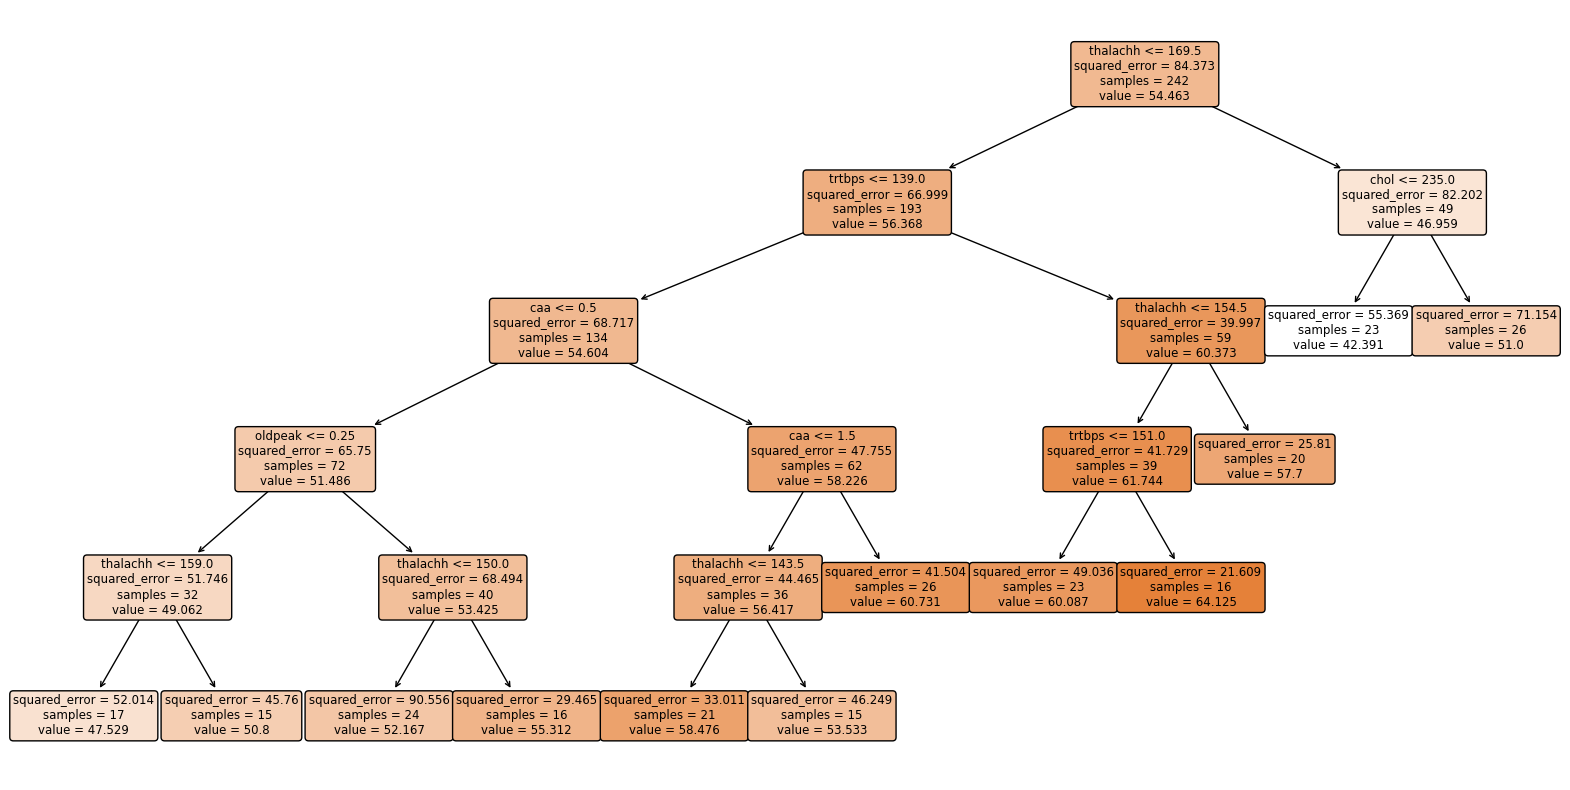

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=features.columns, rounded=True)
plt.show()

נבצע את אותו התהליך ממקודם, עם רגרסיה של עץ החלטה - אבל הפעם ננרמל 3 עמודות מהדטאסט שלנו כדי לראות האם יש הבדל בתוצאות שקיבלנו.


   age    trtbps      chol  fbs  thalachh  exng  oldpeak  caa
0   63  0.481132  0.244292    1  0.603053     0      2.3    0
1   37  0.339623  0.283105    0  0.885496     0      3.5    0
2   41  0.339623  0.178082    0  0.770992     0      1.4    0
3   56  0.245283  0.251142    0  0.816794     0      0.8    0
4   57  0.245283  0.520548    0  0.702290     1      0.6    0
Mean Squared Error (MSE): 66.13514704697964
R^2 Score: 0.09969677997434978


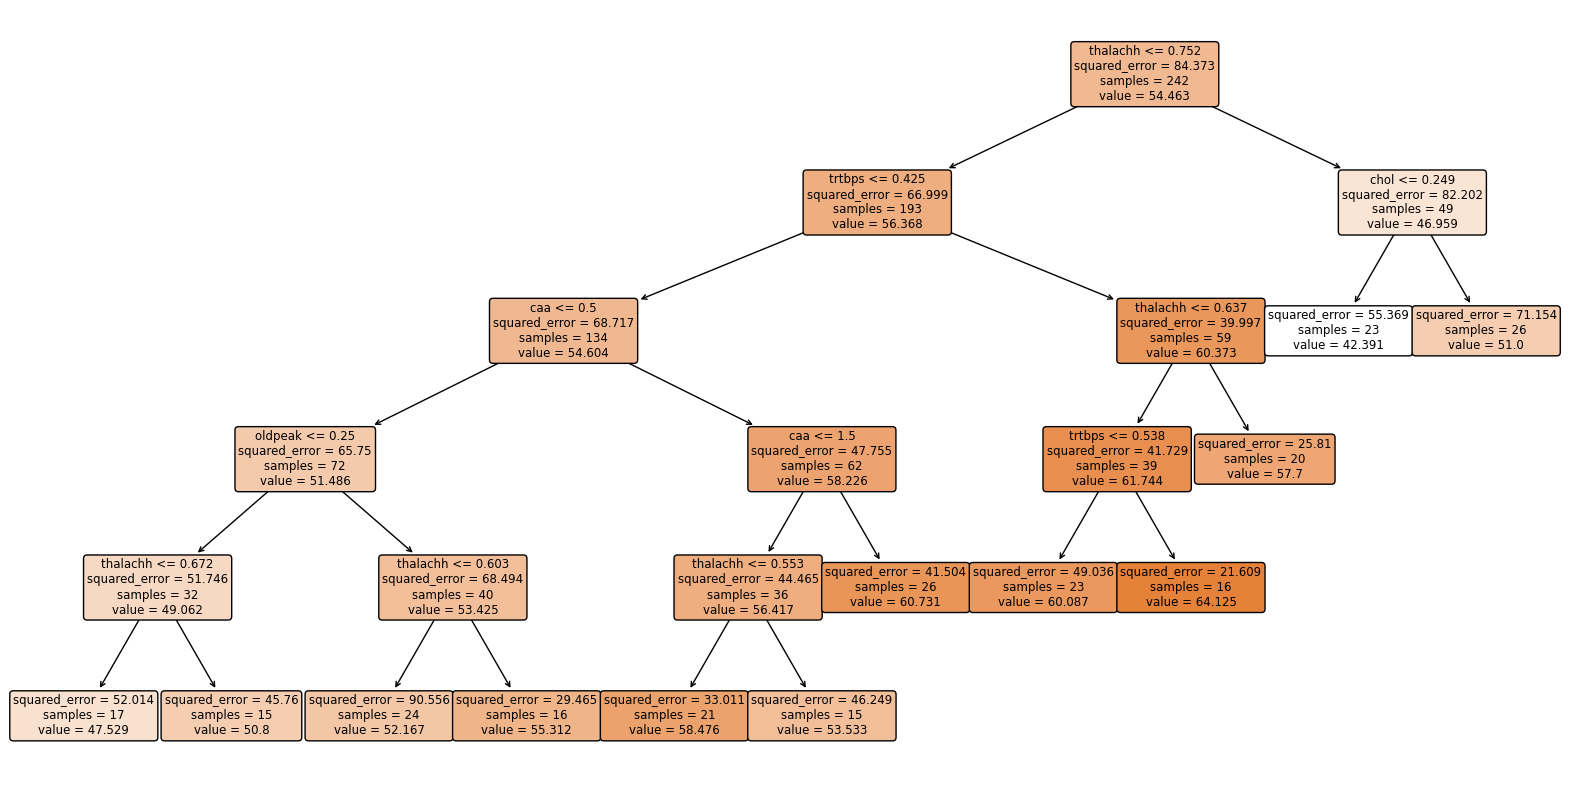

In [ ]:
# מחיקת פיצ'רים עם קורלציה נמוכה לגיל
columns_to_remove = ['thall', 'cp', 'sex', 'restecg', 'slp', 'output']
df_reduced_1 = df.drop(columns=columns_to_remove)

scaler = MinMaxScaler()
df_reduced_1[['thalachh', 'trtbps', 'chol']] = scaler.fit_transform(df_reduced_1[['thalachh', 'trtbps', 'chol']])

# הצגת מספר השורות הראשונות לאימות
print(df_reduced_1.head())

# שמירת עמודת המטרה (גיל)
target_class1 = df_reduced_1['age']

# שמירת כל הפיצ'רים למעט המטרה
features1 = df_reduced_1.drop('age', axis=1)

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, target_class1, test_size=0.2, random_state=42)

# יצירת רגרסור עץ החלטה
regressor = DecisionTreeRegressor(max_depth = 5,min_samples_leaf=15,random_state=1)

# אימון המודל על קבוצת האימון
regressor.fit(X_train1, y_train1)

# תחזית על קבוצת הבדיקה
y_pred1 = regressor.predict(X_test1)

# חישוב מדדי דיוק
mse = mean_squared_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

# הצגת התוצאות
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# ויזואליזציה של עץ ההחלטה
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=features.columns, rounded=True)
plt.show()

נריץ רגרסיה לינארית ונראה גם פה את התוצאות

   age    trtbps      chol  fbs  thalachh  exng  oldpeak  caa
0   63  0.481132  0.244292    1  0.603053     0      2.3    0
1   37  0.339623  0.283105    0  0.885496     0      3.5    0
2   41  0.339623  0.178082    0  0.770992     0      1.4    0
3   56  0.245283  0.251142    0  0.816794     0      0.8    0
4   57  0.245283  0.520548    0  0.702290     1      0.6    0
Mean Squared Error (MSE): 61.479466126579105
R^2 Score: 0.16307494893904728
          Coefficient
trtbps      12.921110
chol        15.158665
fbs          1.642368
thalachh   -19.488193
exng        -0.614545
oldpeak     -0.070392
caa          1.838089


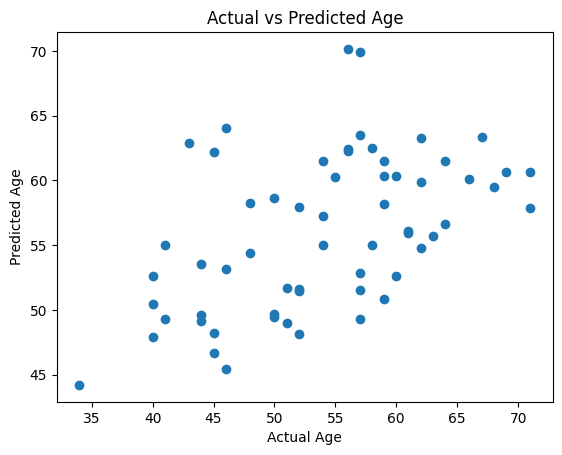

In [ ]:
# מחיקת פיצ'רים עם קורלציה נמוכה לגיל
columns_to_remove = ['thall', 'cp', 'sex', 'restecg', 'slp', 'output']
df_reduced_2 = df.drop(columns=columns_to_remove)

# נורמליזציה של העמודות 'thalachh', 'trtbps', ו-'chol'
scaler = MinMaxScaler()
df_reduced_2[['thalachh', 'trtbps', 'chol']] = scaler.fit_transform(df_reduced_2[['thalachh', 'trtbps', 'chol']])

# הצגת מספר השורות הראשונות לאימות
print(df_reduced_2.head())

# שמירת עמודת המטרה (גיל)
target_class2 = df_reduced_2['age']

# שמירת כל הפיצ'רים למעט המטרה
features2 = df_reduced_2.drop('age', axis=1)

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features2, target_class2, test_size=0.2, random_state=42)

# יצירת מודל רגרסיה לינארית
linear_regressor = LinearRegression()

# אימון המודל על קבוצת האימון
linear_regressor.fit(X_train, y_train)

# תחזית על קבוצת הבדיקה
y_pred = linear_regressor.predict(X_test)

# חישוב מדדי דיוק
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# הצגת התוצאות
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# הצגת המקדם של כל פיצ'ר
coefficients = pd.DataFrame(linear_regressor.coef_, features.columns, columns=['Coefficient'])
print(coefficients)

# אם תרצה להציג את התחזיות מול הערכים האמיתיים:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()

נריץ רגרסיה ליניארית והפעם עם נורמליזציה כדי לראות את ההבדלים אם קיימים בתוצאות.

Mean Squared Error (MSE): 61.479466126579055
R^2 Score: 0.16307494893904784
          Coefficient
trtbps       0.121897
chol         0.034609
fbs          1.642368
thalachh    -0.148765
exng        -0.614545
oldpeak     -0.070392
caa          1.838089


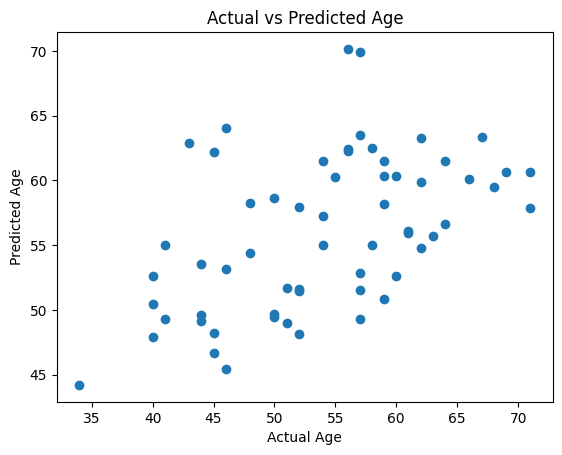

In [ ]:
# שמירת עמודת המטרה (גיל)
target_class2 = df_reduced['age']

# שמירת כל הפיצ'רים למעט המטרה
features2 = df_reduced.drop('age', axis=1)

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features2, target_class2, test_size=0.2, random_state=42)

# יצירת מודל רגרסיה לינארית
linear_regressor = LinearRegression()

# אימון המודל על קבוצת האימון
linear_regressor.fit(X_train, y_train)

# תחזית על קבוצת הבדיקה
y_pred = linear_regressor.predict(X_test)

# חישוב מדדי דיוק
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# הצגת התוצאות
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# הצגת המקדם של כל פיצ'ר
coefficients = pd.DataFrame(linear_regressor.coef_, features.columns, columns=['Coefficient'])
print(coefficients)

# אם תרצה להציג את התחזיות מול הערכים האמיתיים:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()

נריץ גם עוד רגרסור נוסף של רנדום-פורסט כדי לראות הבדלים

   age    trtbps      chol  fbs  thalachh  exng  oldpeak  caa
0   63  0.481132  0.244292    1  0.603053     0      2.3    0
1   37  0.339623  0.283105    0  0.885496     0      3.5    0
2   41  0.339623  0.178082    0  0.770992     0      1.4    0
3   56  0.245283  0.251142    0  0.816794     0      0.8    0
4   57  0.245283  0.520548    0  0.702290     1      0.6    0
Mean Squared Error (MSE): 63.52576885245902
R^2 Score: 0.13521846089119782


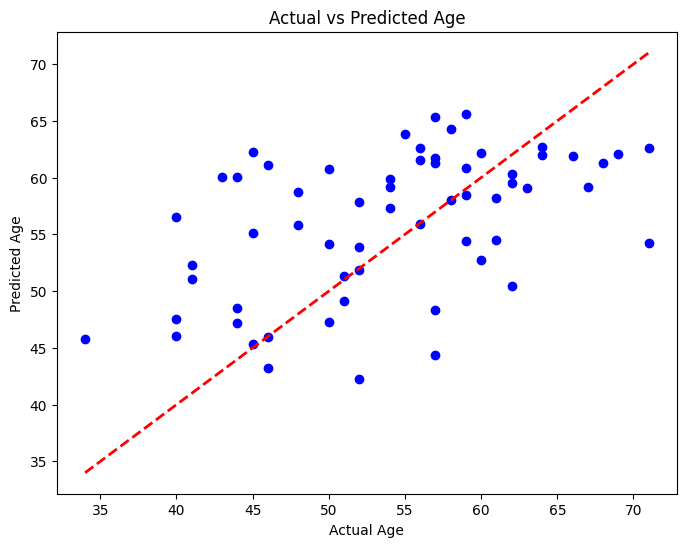

In [ ]:
# מחיקת פיצ'רים עם קורלציה נמוכה לגיל
columns_to_remove = ['thall', 'cp', 'sex', 'restecg', 'slp', 'output']
df_reduced_3 = df.drop(columns=columns_to_remove)

# נורמליזציה של העמודות 'thalachh', 'trtbps', ו-'chol'
scaler = MinMaxScaler()
df_reduced_3[['thalachh', 'trtbps', 'chol']] = scaler.fit_transform(df_reduced_3[['thalachh', 'trtbps', 'chol']])

# הצגת מספר השורות הראשונות לאימות
print(df_reduced_3.head())

# שמירת עמודת המטרה (גיל)
target_class3 = df_reduced_3['age']

# שמירת כל הפיצ'רים למעט המטרה
features3 = df_reduced_3.drop('age', axis=1)

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features3, target_class3, test_size=0.2, random_state=42)

# יצירת המודל של Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# אימון המודל על קבוצת האימון
rf_regressor.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = rf_regressor.predict(X_test)

# חישוב מדדי דיוק
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# הצגת התוצאות
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# ציור הגרף
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

כעת נריץ את הרגרסור ללא ביצוע הנורמליזציה ונבחן את התוצאות ואת השוני בתוצאות שיצאו לנו

Mean Squared Error (MSE): 63.872183606557385
R^2 Score: 0.13050268822711641


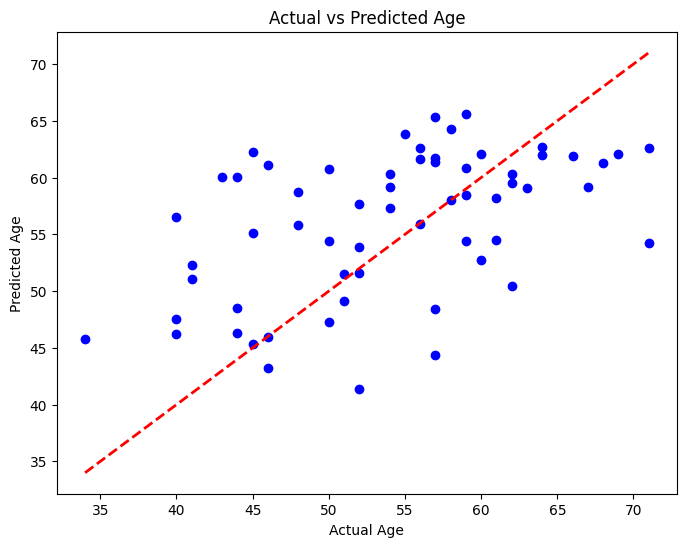

In [ ]:
# שמירת עמודת המטרה (גיל)
target_class2 = df_reduced['age']

# שמירת כל הפיצ'רים למעט המטרה
features2 = df_reduced.drop('age', axis=1)

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features2, target_class2, test_size=0.2, random_state=42)

# יצירת המודל של Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# אימון המודל על קבוצת האימון
rf_regressor.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = rf_regressor.predict(X_test)

# חישוב מדדי דיוק
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# הצגת התוצאות
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# ציור הגרף
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

# שלב 2 - נבצע דיסקרטיזציה על עמודת הגיל שעליה הרצנו ריגרסיה

מחיקת פיצ'רים בעלי קולורציה נמוכה כפי שעשינו ברגרסיה + נורמליזציה של העמודות המספריות + דיסקטרזציה של עמודת הגיל לפני קטגוריות מותאמות לדטאסט

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# מחיקת פיצ'רים עם קורלציה נמוכה לגיל
columns_to_remove = ['thall', 'cp', 'sex', 'restecg', 'slp', 'output']
df_reduced_3 = df.drop(columns=columns_to_remove)

# נורמליזציה של העמודות 'thalachh', 'trtbps', ו-'chol'
scaler = MinMaxScaler()
df_reduced_3[['thalachh', 'trtbps', 'chol']] = scaler.fit_transform(df_reduced_3[['thalachh', 'trtbps', 'chol']])

# דיסקרטיזציה של עמודת הגיל
df_reduced_3['age_group'] = pd.cut(df_reduced_3['age'],
                                   bins=[27, 40, 55, 77],
                                   labels=['29-40', '41-55', '56-77'])

# מחיקת עמודת הגיל המקורית לאחר הדיסקרטיזציה
df_reduced_3 = df_reduced_3.drop(columns=['age'])

# טיפול בערכים חסרים - מחיקת שורות עם ערכים חסרים
df_reduced_3 = df_reduced_3.dropna()

# הצגת מספר השורות הראשונות לאימות
print(df_reduced_3.head())

     trtbps      chol  fbs  thalachh  exng  oldpeak  caa age_group
0  0.481132  0.244292    1  0.603053     0      2.3    0     56-77
1  0.339623  0.283105    0  0.885496     0      3.5    0     29-40
2  0.339623  0.178082    0  0.770992     0      1.4    0     41-55
3  0.245283  0.251142    0  0.816794     0      0.8    0     56-77
4  0.245283  0.520548    0  0.702290     1      0.6    0     56-77


הגדרה של עמודת החיזוי ושאר עמודות הפיצ'רים, בנוסף נחלק לקבוצות מבחן ובדיקה

In [ ]:
# הגדרת הפיצ'רים והמטרות
features = df_reduced_3.drop('age_group', axis=1)
target_class = df_reduced_3['age_group']

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

יצירת מודל קלסיפקציה מסוג עץ החלטה וחיזוי

In [ ]:

# יצירת המודל של Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=15, random_state=1)

# אימון המודל על קבוצת האימון
clf.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = clf.predict(X_test)

ויזואלזציה של עץ ההחלטה

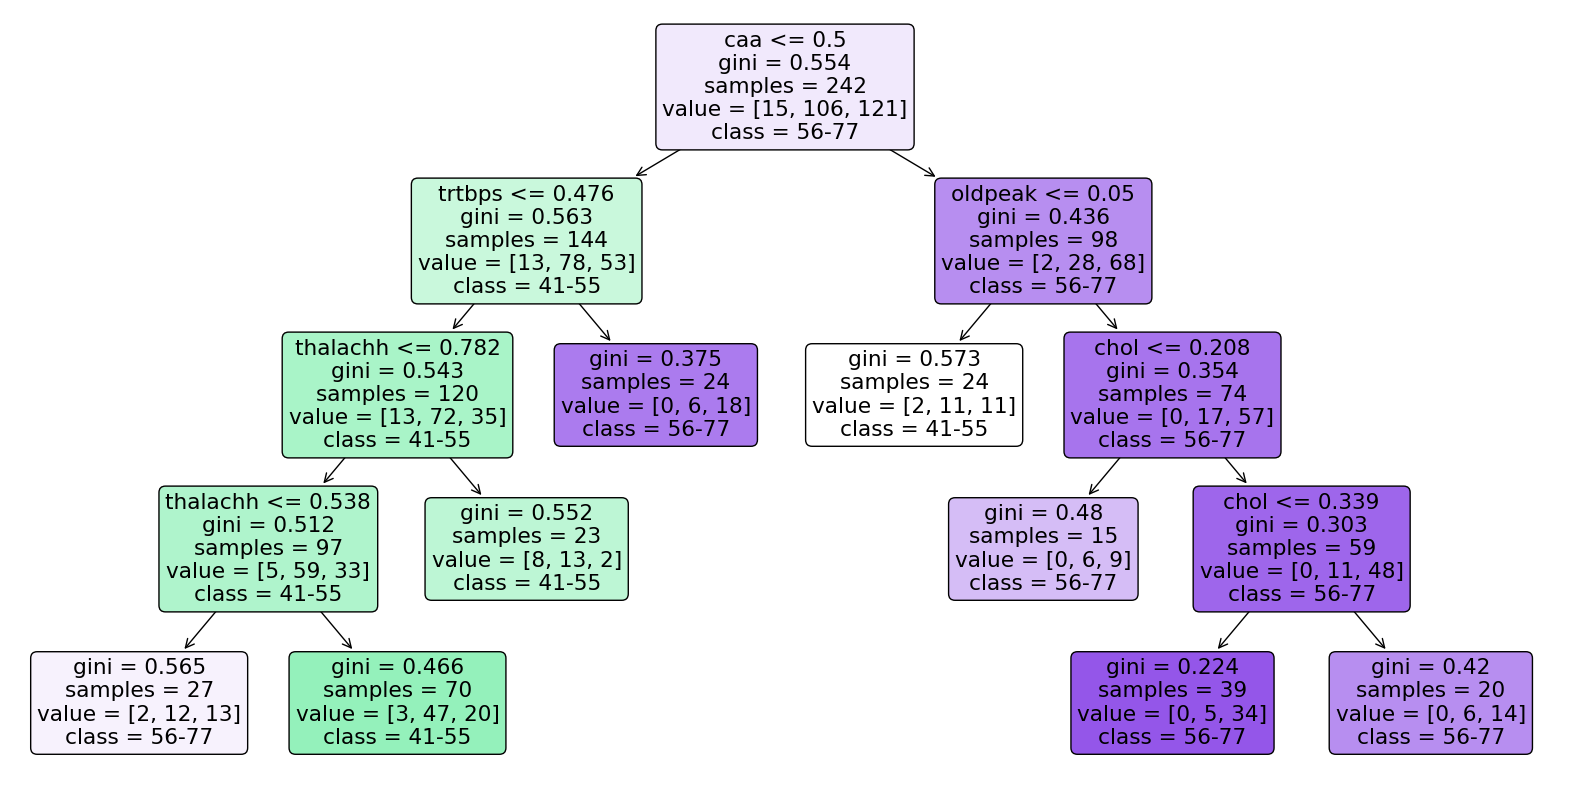

In [ ]:
# ויזואליזציה של עץ ההחלטה
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=features.columns, class_names=clf.classes_, rounded=True)
plt.show()

הצגת הדיוק של המסווג הספציפי והצגת נתונים רלוונטים כדי לבדוק את יעילות המודל המאומן

In [ ]:
# חישוב ה Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7049180327868853

כעת נחשב את הדיוק של המודל על קבוצת האימון, לאחר מכן נחשב את הדיוק של המודל על קבוצת הבדיקה. נבדוק את ההבדל וכך נבין האם אנחנו סובלים מאובר-פיטינג

In [ ]:
print(df_reduced_3['age_group'].value_counts(normalize=True))
# חישוב דיוק המודל על קבוצת האימון
train_accuracy = clf.score(X_train, y_train)

# חישוב דיוק המודל על קבוצת הבדיקה (כבר חושב למעלה כ-accuracy)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

if train_accuracy > test_accuracy:
  print("The classifier suffers from overfitting")
else:
  print("The classifier does not suffers from overfitting")

  import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

print('Accuracy of Decision Tree-Test:',accuracy_score(y_pred,y_test))
y_prob1 = clf.predict_proba(X_test)

# Calculate ROC AUC for each class
for i in range(len(clf.classes_)):
    roc_auc = roc_auc_score(y_test == clf.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf.classes_[i]}: {roc_auc}")


age_group
56-77    0.498350
41-55    0.438944
29-40    0.062706
Name: proportion, dtype: float64
Train Accuracy: 0.6570247933884298
Test Accuracy: 0.7049180327868853
The classifier does not suffers from overfitting
Accuracy of Decision Tree-Test: 0.7049180327868853
AUC ROC of Decision Tree-Test:29-40: 0.7412280701754387
AUC ROC of Decision Tree-Test:41-55: 0.7347494553376905
AUC ROC of Decision Tree-Test:56-77: 0.7612903225806452


נבדוק את ה majority class , נראה שהדיוק שיצא לנו אכן גבוה ממנו כדי לוודא שהמודל פועל ביעילות

In [ ]:
# בדיקת מספר הדוגמאות בכל קבוצה בעמודת המטרה
class_counts = df_reduced_3['age_group'].value_counts()

# מציאת הקבוצה עם המספר הגבוה ביותר (ה-Majority Class)
majority_class = class_counts.idxmax()
majority_class_count = class_counts.max()

# חישוב אחוז ה-Majority Class
total_samples = len(df_reduced_3)
majority_class_percentage = (majority_class_count / total_samples) * 100

print(f"Majority Class: {majority_class}")
print(f"Majority Class Count: {majority_class_count}")
print(f"Majority Class Percentage: {majority_class_percentage:.2f}%")


Majority Class: 56-77
Majority Class Count: 151
Majority Class Percentage: 49.83%


כעת נריץ את אותו עץ החלטה אבל הפעם נעשה oversampling כי שמנו לב שהנתונים לא מחולקים בצורה שווה ואף לגמרי לא שיוויונית בסט שלנו

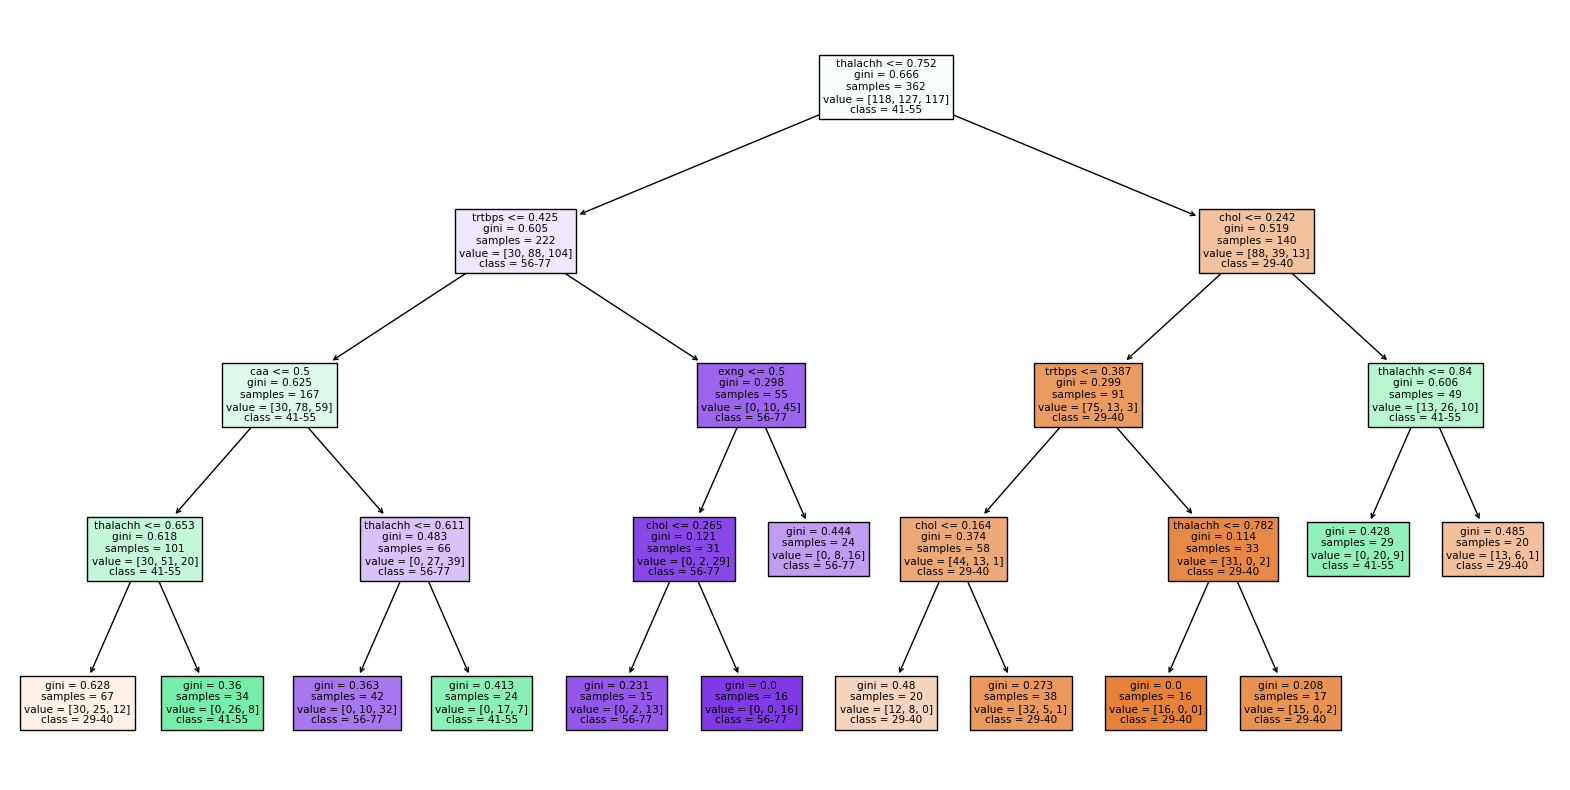

age_group
56-77    0.498350
41-55    0.438944
29-40    0.062706
Name: proportion, dtype: float64
Train Accuracy: 0.712707182320442
Test Accuracy: 0.7472527472527473
The classifier does not suffers from overfitting
Accuracy of Decision Tree-Test: 0.7472527472527473
AUC ROC of Decision Tree-Test:29-40: 0.9634273772204807
AUC ROC of Decision Tree-Test:41-55: 0.7723880597014925
AUC ROC of Decision Tree-Test:56-77: 0.8513931888544892


In [ ]:
import pandas as pd
from sklearn.utils import resample

# ביצוע Oversampling לקטגוריות הקטנות
df_majority_56_77 = df_reduced_3[df_reduced_3['age_group'] == '56-77']
df_majority_41_55 = df_reduced_3[df_reduced_3['age_group'] == '41-55']
df_minority_29_40 = df_reduced_3[df_reduced_3['age_group'] == '29-40']

df_minority_29_40_upsampled = resample(df_minority_29_40,
                                       replace=True,  # דגימה עם החזרה
                                       n_samples=len(df_majority_56_77),  # מספר הדוגמאות בקטגוריה הגדולה ביותר
                                       random_state=42)

df_majority_41_55_upsampled = resample(df_majority_41_55,
                                       replace=True,
                                       n_samples=len(df_majority_56_77),
                                       random_state=42)

# איחוד חזרה של כל הקטגוריות לאחר ה-oversampling
df_upsampled = pd.concat([df_majority_56_77, df_majority_41_55_upsampled, df_minority_29_40_upsampled])

# הגדרת הפיצ'רים והמטרות
features = df_upsampled.drop('age_group', axis=1)
target_class = df_upsampled['age_group']

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

# יצירת המודל של Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, random_state=1)

# אימון המודל על קבוצת האימון
clf.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = clf.predict(X_test)

# ציור עץ ההחלטה
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, filled=True)
plt.show()

print(df_reduced_3['age_group'].value_counts(normalize=True))
# חישוב דיוק המודל על קבוצת האימון
train_accuracy = clf.score(X_train, y_train)

# חישוב דיוק המודל על קבוצת הבדיקה (כבר חושב למעלה כ-accuracy)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

if train_accuracy > test_accuracy:
  print("The classifier suffers from overfitting")
else:
  print("The classifier does not suffers from overfitting")

  import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

print('Accuracy of Decision Tree-Test:',accuracy_score(y_pred,y_test))
y_prob1 = clf.predict_proba(X_test)

# Calculate ROC AUC for each class
for i in range(len(clf.classes_)):
    roc_auc = roc_auc_score(y_test == clf.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf.classes_[i]}: {roc_auc}")


בניית מסווג לינארי לפי הדיסקרטיזציה שבנינו על עמודת הגיל, אימון המודל על קבוצת האימון וביצוע תחזית על קבוצת הבדיקה.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# יצירת המודל של Logistic Regression Classifier
clf = LogisticRegression(random_state=1, max_iter=200)

# אימון המודל על קבוצת האימון
clf.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = clf.predict(X_test)

# חישוב ה-Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6373626373626373


נחשב את דיוק המודל על קבוצת האימון, נחשב את דיוק המודל על קבוצת הבדיקה ולאחר מכן נעשה השוואה כדי לראות האם הוא סובל מאובר-פיטינג

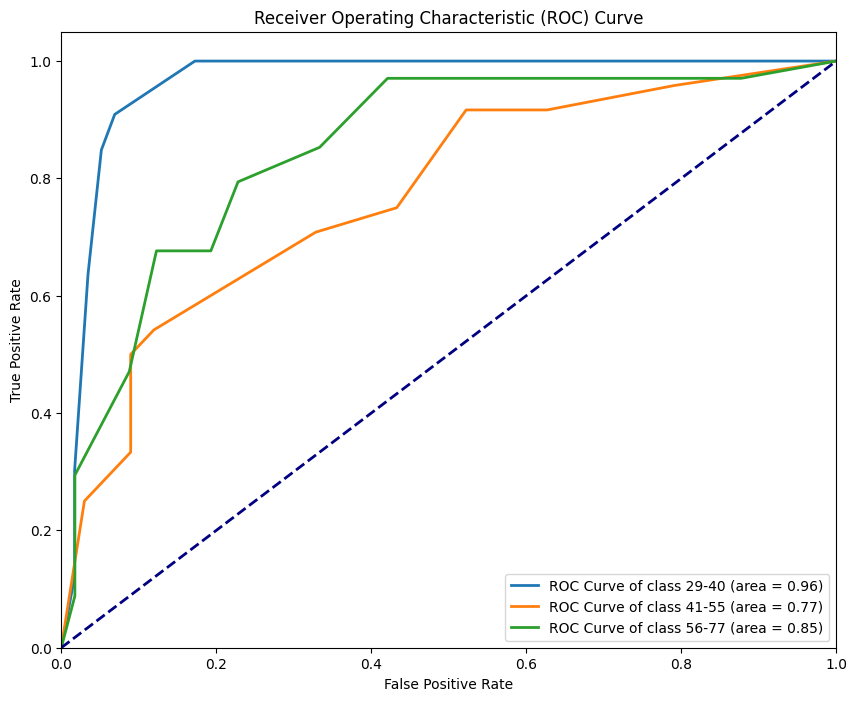

The classifier does not suffer from overfitting
Train Accuracy: 0.5994475138121547
Test Accuracy: 0.6373626373626373
Accuracy of Decision Tree-Test: 0.6373626373626373
AUC ROC of Decision Tree-Test:29-40: 0.8970741901776385
AUC ROC of Decision Tree-Test:41-55: 0.6803482587064675
AUC ROC of Decision Tree-Test:56-77: 0.8575851393188855


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# חישוב ה-ROC Curve עבור כל קטגוריה
plt.figure(figsize=(10, 8))
for i in range(len(clf.classes_)):
    fpr, tpr, _ = roc_curve(y_test == clf.classes_[i], y_prob1[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC Curve of class {clf.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# חישוב דיוק המודל על קבוצת האימון
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# חישוב דיוק המודל על קבוצת הבדיקה (כבר חושב למעלה כ-accuracy)
accuracy_test = accuracy_score(y_test, y_pred)

# בדיקה האם המודל סובל מ-overfitting
if accuracy_train > accuracy_test:
    print("The classifier suffers from overfitting")
else:
    print("The classifier does not suffer from overfitting")

# הצגת תוצאות הדיוק
print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

print('Accuracy of Decision Tree-Test:',accuracy_score(y_pred,y_test))
y_prob1 = clf.predict_proba(X_test)

# Calculate ROC AUC for each class
for i in range(len(clf.classes_)):
    roc_auc = roc_auc_score(y_test == clf.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf.classes_[i]}: {roc_auc}")


הרצת מסווג ליניארי ללא oversampling

Accuracy: 0.6721311475409836
The classifier does not suffer from overfitting
Train Accuracy: 0.6652892561983471
Test Accuracy: 0.6721311475409836


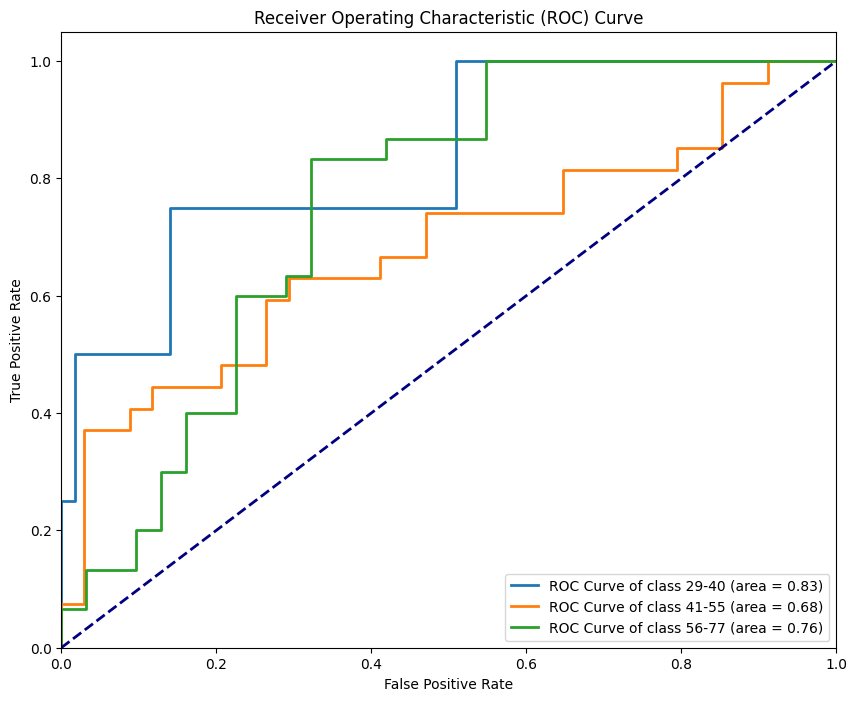

AUC ROC of Logistic Regression-Test: 29-40: 0.8333333333333334
AUC ROC of Logistic Regression-Test: 41-55: 0.6797385620915033
AUC ROC of Logistic Regression-Test: 56-77: 0.7559139784946236


In [ ]:
# הגדרת הפיצ'רים והמטרות
features = df_reduced_3.drop('age_group', axis=1)
target_class = df_reduced_3['age_group']

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

# יצירת המודל של Logistic Regression Classifier
clf = LogisticRegression(random_state=1, max_iter=200)

# אימון המודל על קבוצת האימון
clf.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = clf.predict(X_test)

# חישוב ה-Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

# חישוב דיוק המודל על קבוצת האימון
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# חישוב דיוק המודל על קבוצת הבדיקה (כבר חושב למעלה כ-accuracy)
accuracy_test = accuracy_score(y_test, y_pred)


# בדיקה האם המודל סובל מ-overfitting
if accuracy_train > accuracy_test:
    print("The classifier suffers from overfitting")
else:
    print("The classifier does not suffer from overfitting")

# הצגת תוצאות הדיוק
print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

# חישוב תחזיות הסתברותיות על קבוצת הבדיקה
y_prob1 = clf.predict_proba(X_test)

# חישוב ה-ROC Curve עבור כל קטגוריה
plt.figure(figsize=(10, 8))
for i in range(len(clf.classes_)):
    fpr, tpr, _ = roc_curve(y_test == clf.classes_[i], y_prob1[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC Curve of class {clf.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# חישוב AUC ROC עבור כל קטגוריה
for i in range(len(clf.classes_)):
    roc_auc = roc_auc_score(y_test == clf.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Logistic Regression-Test: {clf.classes_[i]}: {roc_auc}")







הרצת מסווג Naive Bayse עם ביצוע אובר-סמפלינג

Train Accuracy: 0.42265193370165743
Test Accuracy: 0.4835164835164835
The classifier does not suffer from overfitting


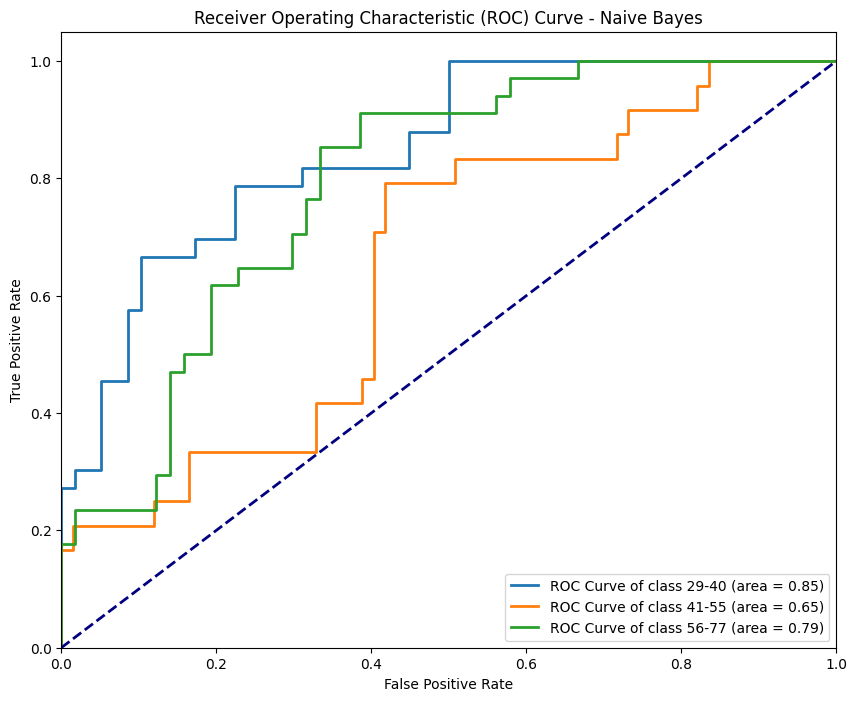

AUC ROC of Naive Bayes-Test: 29-40: 0.8490073145245559
AUC ROC of Naive Bayes-Test: 41-55: 0.6511194029850746
AUC ROC of Naive Bayes-Test: 56-77: 0.7915376676986584


In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# ביצוע Oversampling לקטגוריות הקטנות
df_majority_56_77 = df_reduced_3[df_reduced_3['age_group'] == '56-77']
df_majority_41_55 = df_reduced_3[df_reduced_3['age_group'] == '41-55']
df_minority_29_40 = df_reduced_3[df_reduced_3['age_group'] == '29-40']

df_minority_29_40_upsampled = resample(df_minority_29_40,
                                       replace=True,  # דגימה עם החזרה
                                       n_samples=len(df_majority_56_77),  # מספר הדוגמאות בקטגוריה הגדולה ביותר
                                       random_state=42)

df_majority_41_55_upsampled = resample(df_majority_41_55,
                                       replace=True,
                                       n_samples=len(df_majority_56_77),
                                       random_state=42)

# איחוד חזרה של כל הקטגוריות לאחר ה-oversampling
df_upsampled = pd.concat([df_majority_56_77, df_majority_41_55_upsampled, df_minority_29_40_upsampled])

# הגדרת הפיצ'רים והמטרות
features = df_upsampled.drop('age_group', axis=1)
target_class = df_upsampled['age_group']

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

# יצירת המודל של Naive Bayes Classifier
clf = GaussianNB()

# אימון המודל על קבוצת האימון
clf.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = clf.predict(X_test)

# חישוב דיוק המודל על קבוצת האימון
train_accuracy = clf.score(X_train, y_train)

# חישוב דיוק המודל על קבוצת הבדיקה
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# בדיקה האם המודל סובל מ-overfitting
if train_accuracy > test_accuracy:
    print("The classifier suffers from overfitting")
else:
    print("The classifier does not suffer from overfitting")

# חישוב תחזיות הסתברותיות על קבוצת הבדיקה
y_prob1 = clf.predict_proba(X_test)

# חישוב ה-ROC Curve עבור כל קטגוריה
plt.figure(figsize=(10, 8))
for i in range(len(clf.classes_)):
    fpr, tpr, _ = roc_curve(y_test == clf.classes_[i], y_prob1[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC Curve of class {clf.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# חישוב AUC ROC עבור כל קטגוריה
for i in range(len(clf.classes_)):
    roc_auc = roc_auc_score(y_test == clf.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Naive Bayes-Test: {clf.classes_[i]}: {roc_auc}")


כעת נבצע את הבדיקה ללא oversampling

Train Accuracy: 0.18181818181818182
Test Accuracy: 0.2459016393442623
The classifier does not suffer from overfitting


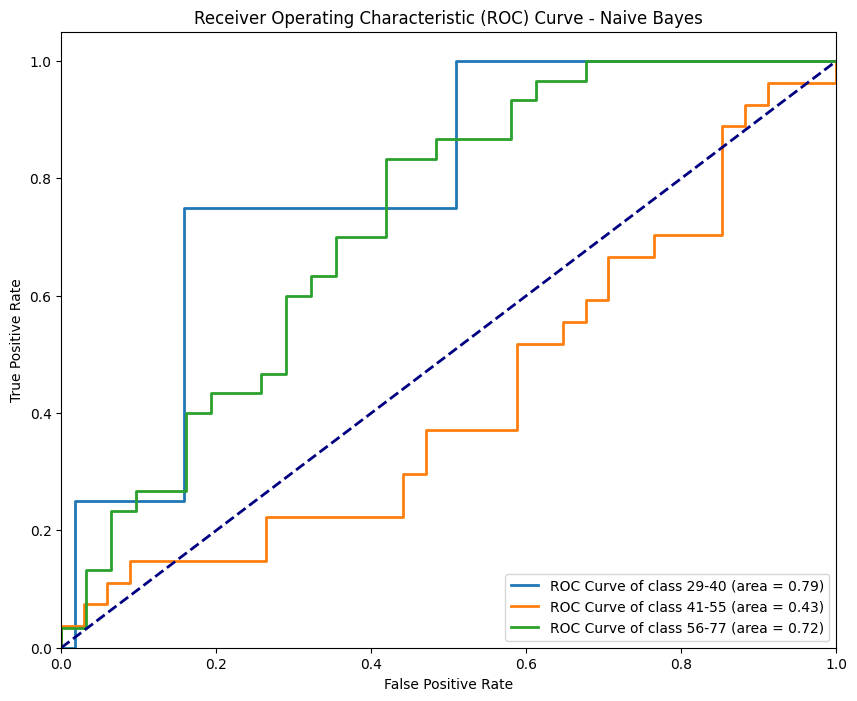

AUC ROC of Naive Bayes-Test: 29-40: 0.7894736842105263
AUC ROC of Naive Bayes-Test: 41-55: 0.4281045751633987
AUC ROC of Naive Bayes-Test: 56-77: 0.7236559139784946


In [ ]:
# הגדרת הפיצ'רים והמטרות
features = df_reduced_3.drop('age_group', axis=1)
target_class = df_reduced_3['age_group']

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

# יצירת המודל של Naive Bayes Classifier
clf = GaussianNB()

# אימון המודל על קבוצת האימון
clf.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = clf.predict(X_test)

# חישוב דיוק המודל על קבוצת האימון
train_accuracy = clf.score(X_train, y_train)

# חישוב דיוק המודל על קבוצת הבדיקה
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# בדיקה האם המודל סובל מ-overfitting
if train_accuracy > test_accuracy:
    print("The classifier suffers from overfitting")
else:
    print("The classifier does not suffer from overfitting")

# חישוב תחזיות הסתברותיות על קבוצת הבדיקה
y_prob1 = clf.predict_proba(X_test)

# חישוב ה-ROC Curve עבור כל קטגוריה
plt.figure(figsize=(10, 8))
for i in range(len(clf.classes_)):
    fpr, tpr, _ = roc_curve(y_test == clf.classes_[i], y_prob1[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC Curve of class {clf.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# חישוב AUC ROC עבור כל קטגוריה
for i in range(len(clf.classes_)):
    roc_auc = roc_auc_score(y_test == clf.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Naive Bayes-Test: {clf.classes_[i]}: {roc_auc}")

הרצת מודל Random-Forest עם ביצוע אובר-סמפלינג

Train Accuracy: 1.0
Test Accuracy: 0.8901098901098901
The classifier suffers from overfitting


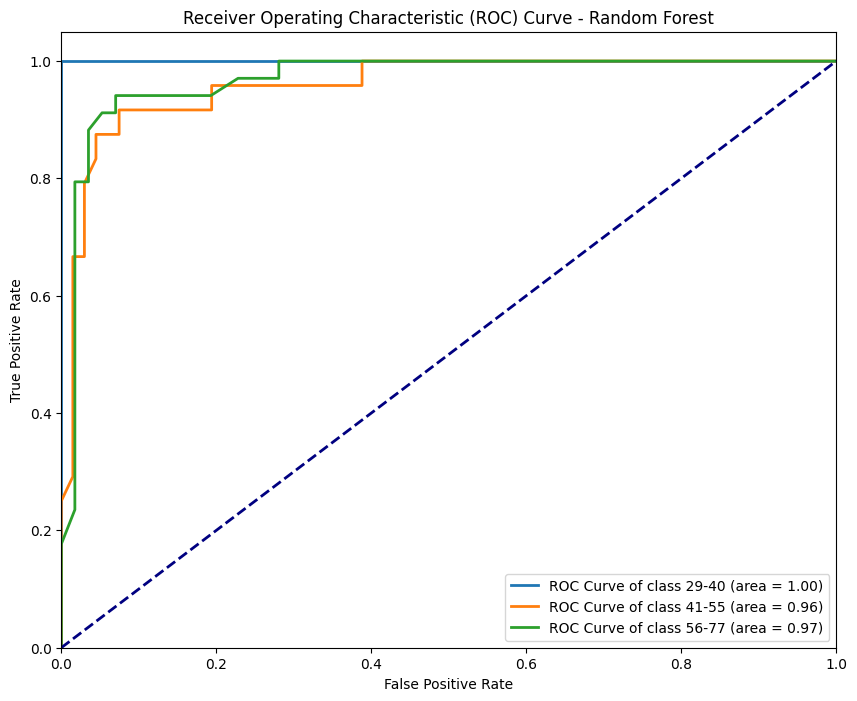

AUC ROC of Random Forest-Test: 29-40: 1.0
AUC ROC of Random Forest-Test: 41-55: 0.9595771144278608
AUC ROC of Random Forest-Test: 56-77: 0.968782249742002


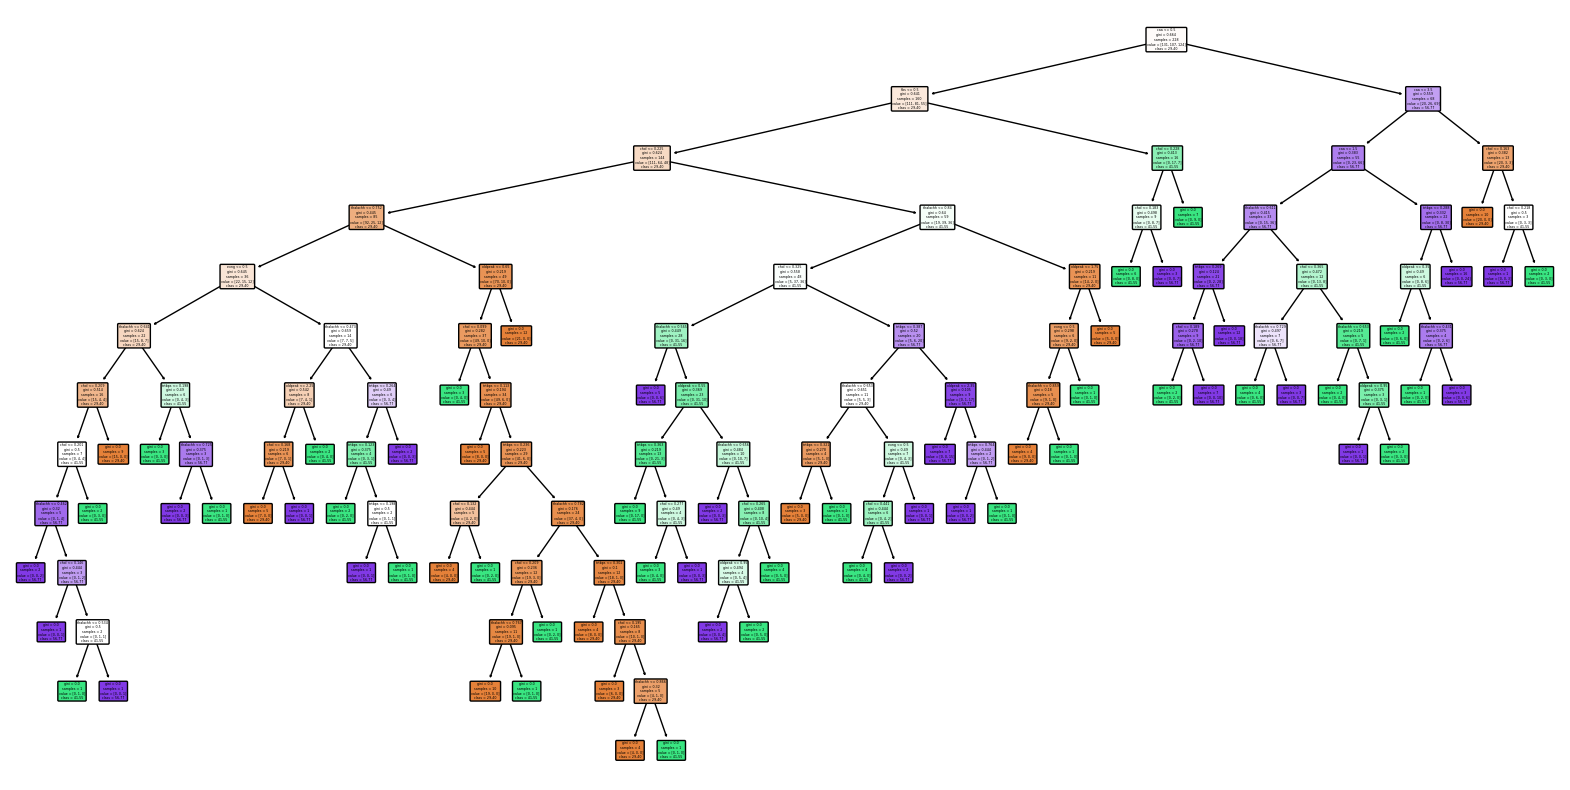

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# ביצוע Oversampling לקטגוריות הקטנות
df_majority_56_77 = df_reduced_3[df_reduced_3['age_group'] == '56-77']
df_majority_41_55 = df_reduced_3[df_reduced_3['age_group'] == '41-55']
df_minority_29_40 = df_reduced_3[df_reduced_3['age_group'] == '29-40']

df_minority_29_40_upsampled = resample(df_minority_29_40,
                                       replace=True,  # דגימה עם החזרה
                                       n_samples=len(df_majority_56_77),  # מספר הדוגמאות בקטגוריה הגדולה ביותר
                                       random_state=42)

df_majority_41_55_upsampled = resample(df_majority_41_55,
                                       replace=True,
                                       n_samples=len(df_majority_56_77),
                                       random_state=42)

# איחוד חזרה של כל הקטגוריות לאחר ה-oversampling
df_upsampled = pd.concat([df_majority_56_77, df_majority_41_55_upsampled, df_minority_29_40_upsampled])

# הגדרת הפיצ'רים והמטרות
features = df_upsampled.drop('age_group', axis=1)
target_class = df_upsampled['age_group']

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

# יצירת המודל של Random Forest Classifier
clf = RandomForestClassifier(n_estimators=70, random_state=42)

# אימון המודל על קבוצת האימון
clf.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = clf.predict(X_test)

# חישוב דיוק המודל על קבוצת האימון
train_accuracy = clf.score(X_train, y_train)

# חישוב דיוק המודל על קבוצת הבדיקה
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# בדיקה האם המודל סובל מ-overfitting
if train_accuracy > test_accuracy:
    print("The classifier suffers from overfitting")
else:
    print("The classifier does not suffer from overfitting")

# חישוב תחזיות הסתברותיות על קבוצת הבדיקה
y_prob1 = clf.predict_proba(X_test)

# חישוב ה-ROC Curve עבור כל קטגוריה
plt.figure(figsize=(10, 8))
for i in range(len(clf.classes_)):
    fpr, tpr, _ = roc_curve(y_test == clf.classes_[i], y_prob1[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC Curve of class {clf.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# חישוב AUC ROC עבור כל קטגוריה
for i in range(len(clf.classes_)):
    roc_auc = roc_auc_score(y_test == clf.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Random Forest-Test: {clf.classes_[i]}: {roc_auc}")

# ציור עץ החלטה מתוך היער המאומן
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=X_train.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()


הרצת מודל random-forest והפעם ללא ביצוע אובר-סמפלינג

Train Accuracy: 0.9958677685950413
Test Accuracy: 0.639344262295082
The classifier suffers from overfitting


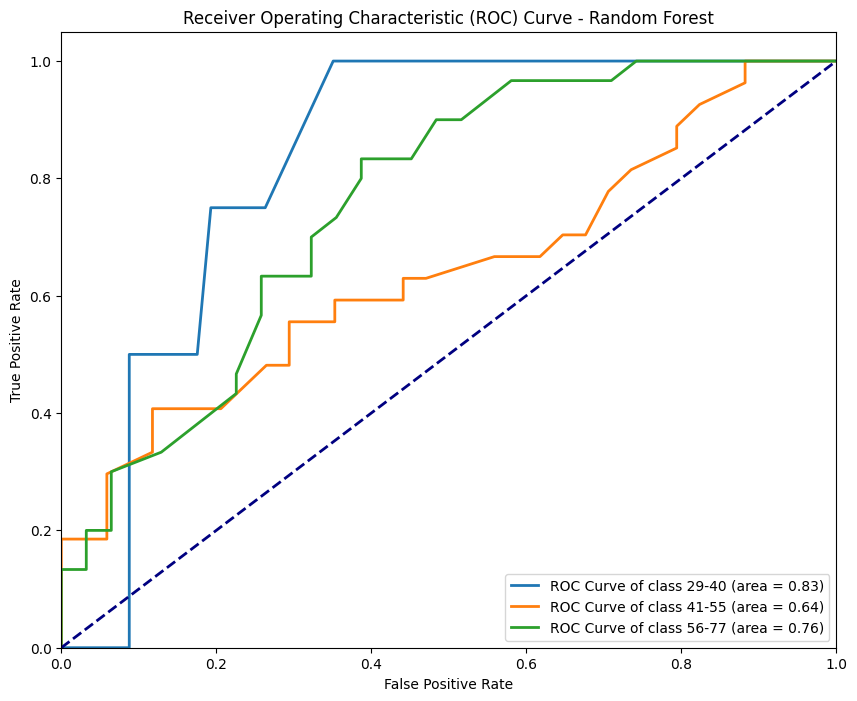

AUC ROC of Random Forest-Test: 29-40: 0.8333333333333333
AUC ROC of Random Forest-Test: 41-55: 0.6405228758169934
AUC ROC of Random Forest-Test: 56-77: 0.7591397849462366


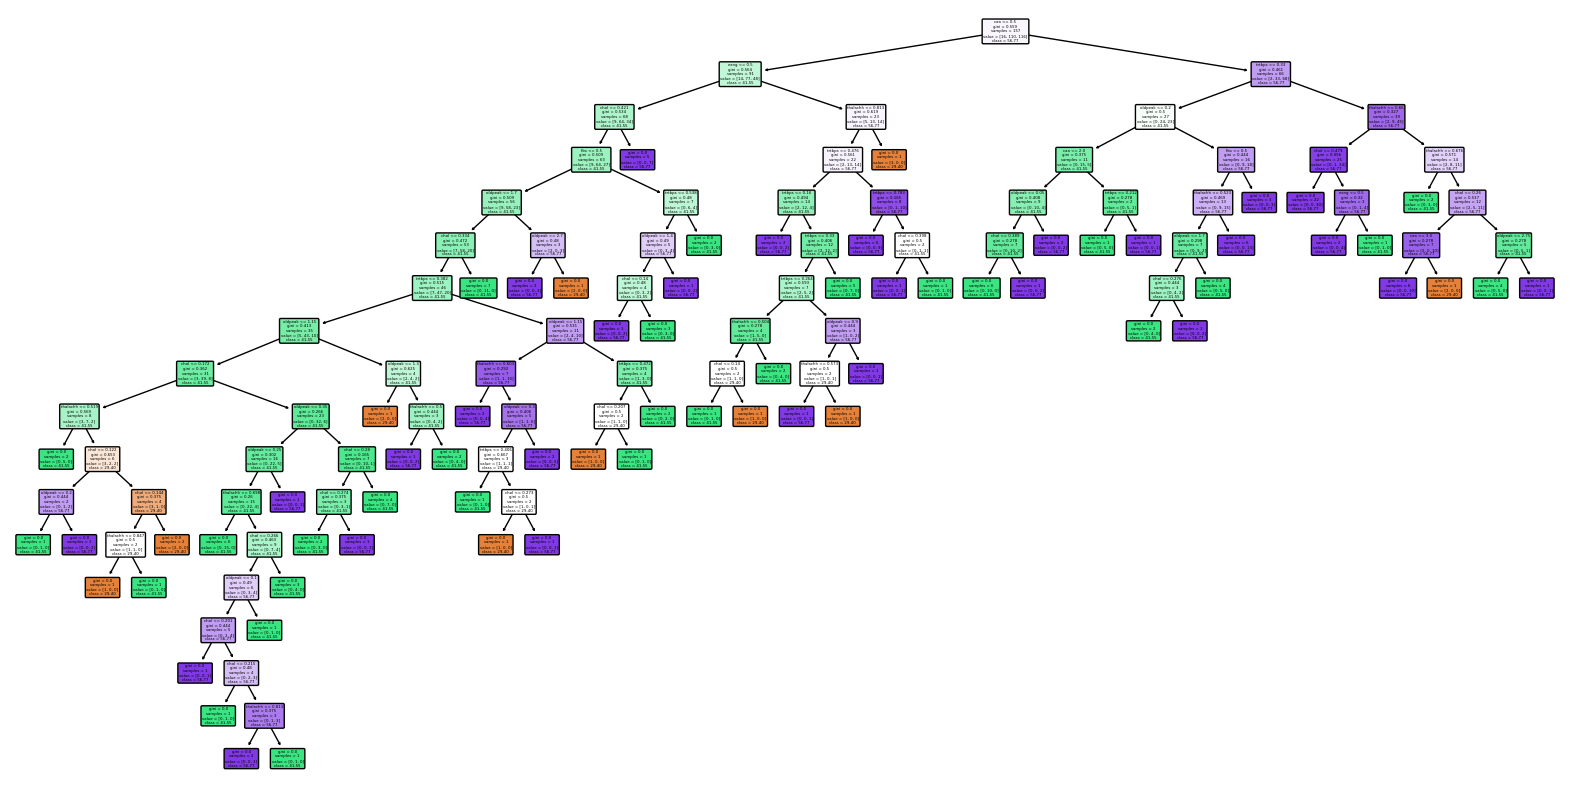

In [ ]:
# הגדרת הפיצ'רים והמטרות
features = df_reduced_3.drop('age_group', axis=1)
target_class = df_reduced_3['age_group']

# חלוקת הנתונים לקבוצות אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.2, random_state=42)

# יצירת המודל של Random Forest Classifier
clf = RandomForestClassifier(n_estimators=70, random_state=42)

# אימון המודל על קבוצת האימון
clf.fit(X_train, y_train)

# ביצוע תחזיות על קבוצת הבדיקה
y_pred = clf.predict(X_test)

# חישוב דיוק המודל על קבוצת האימון
train_accuracy = clf.score(X_train, y_train)

# חישוב דיוק המודל על קבוצת הבדיקה
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# בדיקה האם המודל סובל מ-overfitting
if train_accuracy > test_accuracy:
    print("The classifier suffers from overfitting")
else:
    print("The classifier does not suffer from overfitting")

# חישוב תחזיות הסתברותיות על קבוצת הבדיקה
y_prob1 = clf.predict_proba(X_test)

# חישוב ה-ROC Curve עבור כל קטגוריה
plt.figure(figsize=(10, 8))
for i in range(len(clf.classes_)):
    fpr, tpr, _ = roc_curve(y_test == clf.classes_[i], y_prob1[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC Curve of class {clf.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# חישוב AUC ROC עבור כל קטגוריה
for i in range(len(clf.classes_)):
    roc_auc = roc_auc_score(y_test == clf.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Random Forest-Test: {clf.classes_[i]}: {roc_auc}")

# ציור עץ החלטה מתוך היער המאומן
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=X_train.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

10-fold

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
import numpy as np

# הגדרת הפיצ'רים והמטרות
features = df_upsampled.drop('age_group', axis=1)
target_class = df_upsampled['age_group']

# בינאריזציה של היעדים לחישוב AUC לכל קטגוריה
classes = target_class.unique()
target_class_bin = label_binarize(target_class, classes=classes)

# הגדרת StratifiedKFold ל-Fold-10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# מסווגים
classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Naive Bayes": GaussianNB()
}

# אחסון התוצאות
results = {}

# ריצה על כל מסווג
for name, clf in classifiers.items():
    auc_scores = []
    y_prob_all = cross_val_predict(clf, features, target_class, cv=skf, method='predict_proba')

    for i, class_name in enumerate(classes):
        roc_auc = roc_auc_score(target_class_bin[:, i], y_prob_all[:, i])
        auc_scores.append(roc_auc)
        print(f"AUC ROC of {name} - Test: {class_name}: {roc_auc:.4f}")

    general_auc = np.mean(auc_scores)
    results[name] = general_auc
    print(f"General AUC ROC of {name} - Test: {general_auc:.4f}\n")

# הצגת התוצאות הסופיות לכל מסווג
print("\nFold-10 Results Summary:")
for name, auc in results.items():
    print(f"{name}: General AUC ROC: {auc:.4f}")


AUC ROC of Decision Tree - Test: 56-77: 0.2057
AUC ROC of Decision Tree - Test: 41-55: 0.7452
AUC ROC of Decision Tree - Test: 29-40: 0.1105
General AUC ROC of Decision Tree - Test: 0.3538

AUC ROC of Random Forest - Test: 56-77: 0.2440
AUC ROC of Random Forest - Test: 41-55: 0.9448
AUC ROC of Random Forest - Test: 29-40: 0.0257
General AUC ROC of Random Forest - Test: 0.4048

AUC ROC of Logistic Regression - Test: 56-77: 0.2120
AUC ROC of Logistic Regression - Test: 41-55: 0.6776
AUC ROC of Logistic Regression - Test: 29-40: 0.2091
General AUC ROC of Logistic Regression - Test: 0.3662

AUC ROC of Naive Bayes - Test: 56-77: 0.2529
AUC ROC of Naive Bayes - Test: 41-55: 0.6129
AUC ROC of Naive Bayes - Test: 29-40: 0.1776
General AUC ROC of Naive Bayes - Test: 0.3478


Fold-10 Results Summary:
Decision Tree: General AUC ROC: 0.3538
Random Forest: General AUC ROC: 0.4048
Logistic Regression: General AUC ROC: 0.3662
Naive Bayes: General AUC ROC: 0.3478


הרצה כעת בלי אובר-סמפלינג

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
import numpy as np

# הגדרת הפיצ'רים והמטרות
features = df_reduced_3.drop('age_group', axis=1)
target_class = df_reduced_3['age_group']

# בינאריזציה של היעדים לחישוב AUC לכל קטגוריה
classes = target_class.unique()
target_class_bin = label_binarize(target_class, classes=classes)

# הגדרת StratifiedKFold ל-Fold-10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# מסווגים
classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Naive Bayes": GaussianNB()
}

# אחסון התוצאות
results = {}

# ריצה על כל מסווג
for name, clf in classifiers.items():
    auc_scores = []
    y_prob_all = cross_val_predict(clf, features, target_class, cv=skf, method='predict_proba')

    for i, class_name in enumerate(classes):
        roc_auc = roc_auc_score(target_class_bin[:, i], y_prob_all[:, i])
        auc_scores.append(roc_auc)
        print(f"AUC ROC of {name} - Test: {class_name}: {roc_auc:.4f}")

    general_auc = np.mean(auc_scores)
    results[name] = general_auc
    print(f"General AUC ROC of {name} - Test: {general_auc:.4f}\n")

# הצגת התוצאות הסופיות לכל מסווג
print("\nFold-10 Results Summary:")
for name, auc in results.items():
    print(f"{name}: General AUC ROC: {auc:.4f}")


AUC ROC of Decision Tree - Test: 56-77: 0.3168
AUC ROC of Decision Tree - Test: 29-40: 0.6694
AUC ROC of Decision Tree - Test: 41-55: 0.3614
General AUC ROC of Decision Tree - Test: 0.4492

AUC ROC of Random Forest - Test: 56-77: 0.3056
AUC ROC of Random Forest - Test: 29-40: 0.6459
AUC ROC of Random Forest - Test: 41-55: 0.3587
General AUC ROC of Random Forest - Test: 0.4367

AUC ROC of Logistic Regression - Test: 56-77: 0.2870
AUC ROC of Logistic Regression - Test: 29-40: 0.7524
AUC ROC of Logistic Regression - Test: 41-55: 0.3125
General AUC ROC of Logistic Regression - Test: 0.4507

AUC ROC of Naive Bayes - Test: 56-77: 0.3284
AUC ROC of Naive Bayes - Test: 29-40: 0.3262
AUC ROC of Naive Bayes - Test: 41-55: 0.3448
General AUC ROC of Naive Bayes - Test: 0.3331


Fold-10 Results Summary:
Decision Tree: General AUC ROC: 0.4492
Random Forest: General AUC ROC: 0.4367
Logistic Regression: General AUC ROC: 0.4507
Naive Bayes: General AUC ROC: 0.3331


# שלב 2 - לחזות האם אדם בעל סיכון מוגבר לקבל התקף לב או לא

Save two variables:
1) the target class - out put
2) all the features except the target class.

In [7]:
X = df.drop('output', axis=1)
y = df['output']

In [8]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


Divide into training set and test sets (80%-20%).

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [14]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [15]:
y_train

,output
62,1
127,1
111,1
287,0
108,1
...,...
203,0
255,0
72,1
235,0


In [16]:
y_test

,output
204,0
159,1
219,0
174,0
184,0
...,...
0,1
288,0
259,0
179,0


Create a decision tree classifier using sklearn

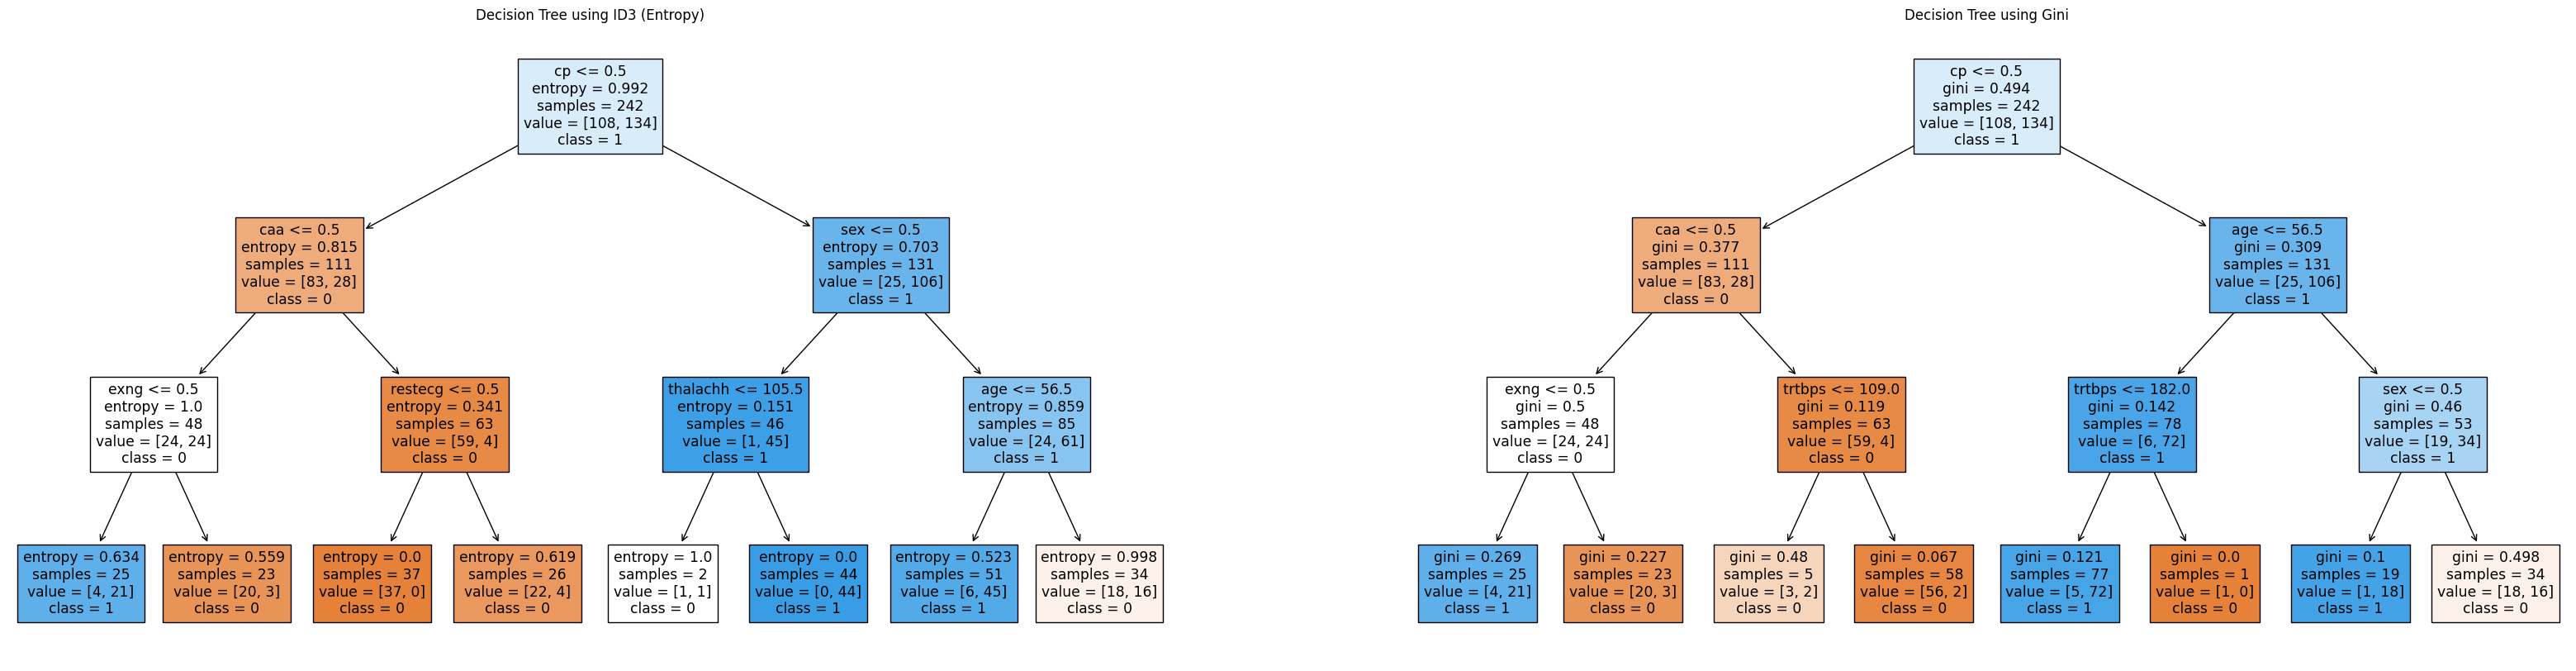

In [19]:
id3_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
gini_tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)

# Train the models
id3_tree.fit(X_train, y_train)
gini_tree.fit(X_train, y_train)

# Visualize the trees
plt.figure(figsize=(40, 10))

plt.subplot(1, 2, 1)
tree.plot_tree(id3_tree, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree using ID3 (Entropy)")

plt.subplot(1, 2, 2)
tree.plot_tree(gini_tree, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree using Gini")

plt.show()

Predict output colum by the test section(X_test) and the decision trees

In [20]:
pred_id3 = id3_tree.predict(X_test)
pred_gini = gini_tree.predict(X_test)

print(pred_id3)
print("\n")
print(pred_gini)

[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0]


[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0]


Calculation of how certain the result of the value is in percentages

In [21]:
prob_id3 = id3_tree.predict_proba(X_test)
prob_gini = gini_tree.predict_proba(X_test)

print(prob_id3)
print("\n")
print(prob_gini)

[[1.         0.        ]
 [0.11764706 0.88235294]
 [1.         0.        ]
 [1.         0.        ]
 [0.16       0.84      ]
 [1.         0.        ]
 [0.86956522 0.13043478]
 [0.86956522 0.13043478]
 [1.         0.        ]
 [0.         1.        ]
 [0.16       0.84      ]
 [0.52941176 0.47058824]
 [0.         1.        ]
 [0.52941176 0.47058824]
 [0.11764706 0.88235294]
 [0.         1.        ]
 [0.11764706 0.88235294]
 [1.         0.        ]
 [0.16       0.84      ]
 [0.52941176 0.47058824]
 [0.         1.        ]
 [0.84615385 0.15384615]
 [0.11764706 0.88235294]
 [0.         1.        ]
 [0.         1.        ]
 [0.11764706 0.88235294]
 [1.         0.        ]
 [0.11764706 0.88235294]
 [0.11764706 0.88235294]
 [0.         1.        ]
 [0.11764706 0.88235294]
 [0.11764706 0.88235294]
 [0.11764706 0.88235294]
 [1.         0.        ]
 [0.86956522 0.13043478]
 [0.86956522 0.13043478]
 [0.16       0.84      ]
 [0.84615385 0.15384615]
 [0.16       0.84      ]
 [0.86956522 0.13043478]


Use performance measures, such as accuracy to evaluate the predictions.

In [22]:
accuracy_score_id3 = accuracy_score(pred_id3,y_test)
accuracy_score_gini = accuracy_score(pred_gini,y_test)


print("Accuracy of id3 decision tree test set" ,accuracy_score_id3 )
print("\n")
print("Accuracy of gini decision tree test set" ,accuracy_score_gini )

Accuracy of id3 decision tree test set 0.7049180327868853


Accuracy of gini decision tree test set 0.7049180327868853


Is the classifier suffer from overfitting?

In [23]:
y_pred_train_id3 = id3_tree.predict(X_train)
y_pred_train_gini = gini_tree.predict(X_train)


print("Accuracy of id3 decision tree train set " ,accuracy_score(y_pred_train_id3,y_train) )
print("\n")
print("Accuracy of gini decision tree train set" ,accuracy_score(y_pred_train_gini,y_train) )

Accuracy of id3 decision tree train set  0.859504132231405


Accuracy of gini decision tree train set 0.8636363636363636


ROC AUC For Desision Trees

In [24]:
roc_prob_id3 = id3_tree.predict_proba(X_test)[:, 1]
roc_prob_gini = gini_tree.predict_proba(X_test)[:, 1]


roc_auc_dt_id3 = roc_auc_score(y_test, roc_prob_id3)
roc_auc_dt_gini = roc_auc_score(y_test, roc_prob_gini)

print("ROC AUC for ID3:", roc_auc_dt_id3)
print("ROC AUC for Gini:", roc_auc_dt_gini)

ROC AUC for ID3: 0.7473118279569892
ROC AUC for Gini: 0.7629032258064516


Linear Classification

In [27]:
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy)

#  print a detailed classification report and confusion matrix
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

roc_y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]

roc_auc_logistic = roc_auc_score(y_test, roc_y_pred_logistic)
print("ROC AUC for Linear Classification:", roc_auc_logistic)

Accuracy: 0.7704918032786885
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

[[20 10]
 [ 4 27]]
ROC AUC for Linear Classification: 0.8387096774193549


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbors (kNN) Model

In [29]:
# Create the kNN model (k=3, for example)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

#  print a detailed classification report and confusion matrix
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


roc_y_pred_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, roc_y_pred_knn)
print("ROC AUC for k-Nearest Neighbors:", roc_auc_knn)

Accuracy: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.60      0.40      0.48        30
           1       0.56      0.74      0.64        31

    accuracy                           0.57        61
   macro avg       0.58      0.57      0.56        61
weighted avg       0.58      0.57      0.56        61

[[12 18]
 [ 8 23]]
ROC AUC for k-Nearest Neighbors: 0.5360215053763441


Random Forest

In [31]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Print a detailed classification report and confusion matrix
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

roc_y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, roc_y_pred_rf)
print("ROC AUC for Random Forest:", roc_auc_rf)

Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

[[21  9]
 [ 6 25]]
ROC AUC for Random Forest: 0.8360215053763441


# שלב 2 - ביצוע נורמליזציה למאפייני הדאטה סט

In [33]:
new_X = df[['age', 'thalachh', 'oldpeak', 'caa', 'thall']]
new_y = df['output']

In [34]:
new_X

,age,thalachh,oldpeak,caa,thall
0,63,150,2.3,0,1
1,37,187,3.5,0,2
2,41,172,1.4,0,2
3,56,178,0.8,0,2
4,57,163,0.6,0,2
...,...,...,...,...,...
298,57,123,0.2,0,3
299,45,132,1.2,0,3
300,68,141,3.4,2,3
301,57,115,1.2,1,3


In [35]:
new_y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


Divide into training set and test sets (80%-20%).

In [36]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size = 0.2, random_state = 1)

In [37]:
X_train

,age,thalachh,oldpeak,caa,thall
62,52,190,0.0,0,1
127,67,172,0.0,1,2
111,57,173,0.2,1,3
287,57,164,0.0,1,2
108,50,162,1.1,0,2
...,...,...,...,...,...
203,68,150,1.6,0,3
255,45,147,0.0,3,3
72,29,202,0.0,0,2
235,51,173,1.6,0,3


In [38]:
X_test

,age,thalachh,oldpeak,caa,thall
204,62,145,6.2,3,3
159,56,163,0.0,0,3
219,48,150,0.0,2,3
174,60,132,2.4,2,3
184,50,128,2.6,0,3
...,...,...,...,...,...
0,63,150,2.3,0,1
288,57,143,3.0,1,3
259,38,182,3.8,0,3
179,57,112,0.6,1,1


In [39]:
y_train

,output
62,1
127,1
111,1
287,0
108,1
...,...
203,0
255,0
72,1
235,0


In [40]:
y_test

,output
204,0
159,1
219,0
174,0
184,0
...,...
0,1
288,0
259,0
179,0


Create a decision tree classifier using sklearn

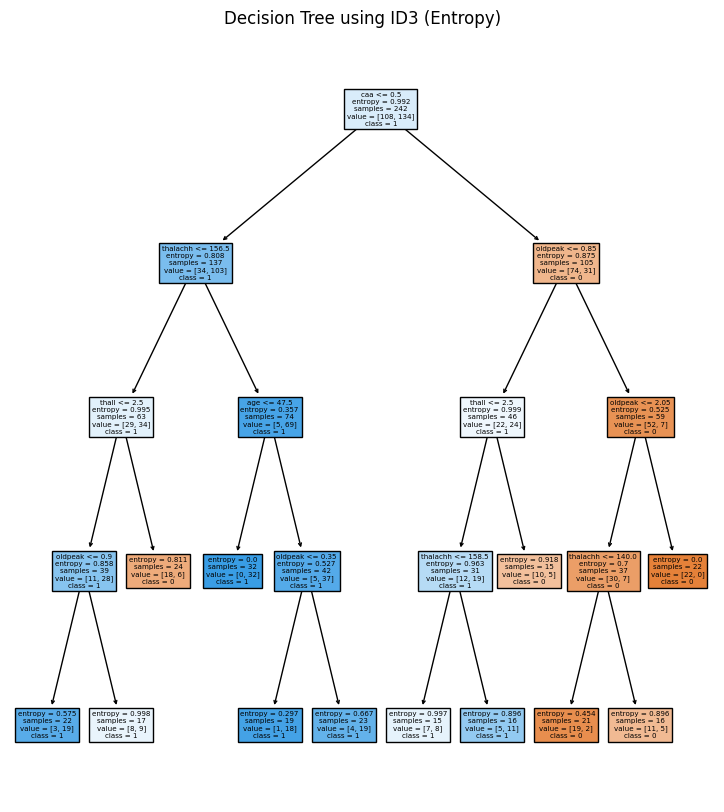

In [41]:
id3_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4,min_samples_leaf=15, random_state=1)

# Train the models
id3_tree.fit(X_train, y_train)

# Visualize the trees
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
tree.plot_tree(id3_tree, feature_names=new_X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree using ID3 (Entropy)")


plt.show()

Predict output colum by the test section(X_test) and the decision trees

In [42]:
pred_id3 = id3_tree.predict(X_test)


print(pred_id3)
print("\n")

[0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1]




Calculation of how certain the result of the value is in percentages

In [43]:
prob_id3 = id3_tree.predict_proba(X_test)


print(prob_id3)


[[1.         0.        ]
 [0.05263158 0.94736842]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.75       0.25      ]
 [1.         0.        ]
 [0.75       0.25      ]
 [0.13636364 0.86363636]
 [1.         0.        ]
 [0.13636364 0.86363636]
 [0.13636364 0.86363636]
 [0.6875     0.3125    ]
 [0.46666667 0.53333333]
 [0.75       0.25      ]
 [0.9047619  0.0952381 ]
 [0.3125     0.6875    ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.05263158 0.94736842]
 [0.13636364 0.86363636]
 [1.         0.        ]
 [0.75       0.25      ]
 [0.46666667 0.53333333]
 [0.         1.        ]
 [0.3125     0.6875    ]
 [1.         0.        ]
 [0.         1.        ]
 [0.13636364 0.86363636]
 [0.05263158 0.94736842]
 [0.         1.        ]
 [0.17391304 0.82608696]
 [0.47058824 0.52941176]
 [0.3125     0.6875    ]
 [0.75       0.25      ]
 [0.05263158 0.94736842]
 [0.47058824 0.52941176]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [0.75       0.25      ]


Check Overfitting

In [44]:
accuracy_score_id3 = accuracy_score(pred_id3,y_test)

print("Accuracy of id3 decision tree test set" ,accuracy_score_id3 )

Accuracy of id3 decision tree test set 0.8032786885245902


In [45]:
y_pred_train_id3 = id3_tree.predict(X_train)


print("Accuracy of id3 decision tree train set " ,accuracy_score(y_pred_train_id3,y_train) )

Accuracy of id3 decision tree train set  0.8099173553719008


ROC AUC For ID3 Desision Tree

In [46]:
roc_prob_id3 = id3_tree.predict_proba(X_test)[:, 1]


roc_auc_dt_id3 = roc_auc_score(y_test, roc_prob_id3)

print("ROC AUC for ID3:", roc_auc_dt_id3)


ROC AUC for ID3: 0.7876344086021505


Linear Classification After Normalization

In [47]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))
roc_y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
roc_auc_logistic = roc_auc_score(y_test, roc_y_pred_logistic)
print("ROC AUC for Linear Classification:", roc_auc_logistic)

Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61

[[21  9]
 [ 2 29]]
ROC AUC for Linear Classification: 0.8731182795698925


K-Nearest Neighbors (kNN) Model After Normalization

In [49]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
roc_y_pred_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, roc_y_pred_knn)
print("ROC AUC for k-Nearest Neighbors:", roc_auc_knn)

Accuracy: 0.639344262295082
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        30
           1       0.61      0.81      0.69        31

    accuracy                           0.64        61
   macro avg       0.65      0.64      0.63        61
weighted avg       0.65      0.64      0.63        61

[[14 16]
 [ 6 25]]
ROC AUC for k-Nearest Neighbors: 0.6682795698924732


Random Forest After Normalization

In [51]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
roc_y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, roc_y_pred_rf)
print("ROC AUC for Random Forest:", roc_auc_rf)

Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

[[22  8]
 [ 3 28]]
ROC AUC for Random Forest: 0.8715053763440861
